In [1]:
cd /g/data/jk72/deg581/apom/ana/notebooks

/g/data/jk72/deg581/apom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import matplotlib.ticker as mticker

## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')


## fro mFabio
from datetime import datetime, timedelta


from dask.distributed import Client
import logging
import warnings
warnings.filterwarnings('ignore')

In [3]:
client = Client(threads_per_worker=1, memory_limit=0, silence_logs=logging.ERROR)
print(client)

<Client: 'tcp://127.0.0.1:44445' processes=28 threads=28>


In [4]:
# # load single ROMS netcdf with xr
# # ds = xr.open_dataset('../data/proc/roms_v11_TotOptions_his_0003_5daymn.nc')
# ds = xr.open_dataset('../data/proc/roms_v11_ctrl_his_0011-13_5daymn_full.nc')
# ds

In [5]:
grd = xr.open_dataset('../data/proc/amery_v11_ctrl_diags_grd.nc')
weights = (1/grd.pm)*(1/grd.pn)
weights.name = "weights"

In [6]:
%%time
salt_hadv_int = xr.open_dataarray('../data/proc/amery_v11_ctrl_diags_salt_hadv_int.nc')
salt_vadv_int = xr.open_dataarray('../data/proc/amery_v11_ctrl_diags_salt_vadv_int.nc')
salt_hdiff_int = xr.open_dataarray('../data/proc/amery_v11_ctrl_diags_salt_hdiff_int.nc')
salt_vdiff_int = xr.open_dataarray('../data/proc/amery_v11_ctrl_diags_salt_vdiff_int.nc')


CPU times: user 415 ms, sys: 229 ms, total: 643 ms
Wall time: 2.51 s


In [7]:
# salt_hadv_dz.load()
# print('loaded.')
# salt_vadv_dz.load()
# print('loaded.')
# salt_hdiff_dz.load()
# print('loaded.')
# salt_vdiff_dz.load()
# print('loaded.')


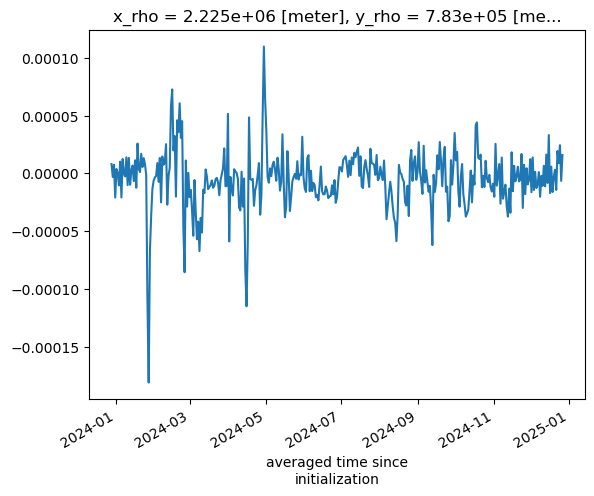

In [8]:
salt_hadv_int.isel(xi_rho=362,eta_rho=391).plot()

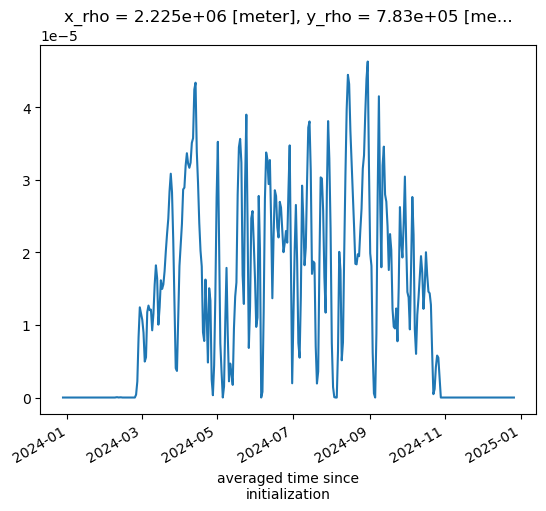

In [9]:
salt_vdiff_int.isel(xi_rho=362,eta_rho=391).plot()

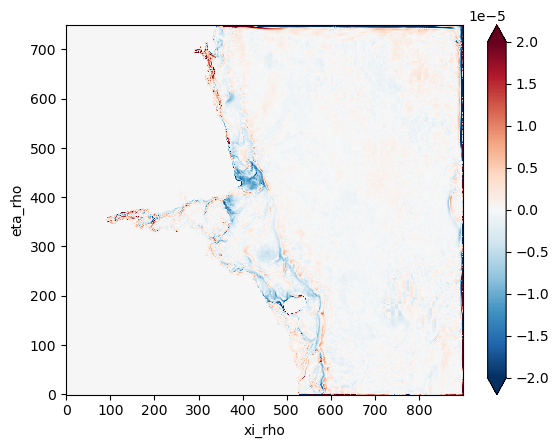

In [10]:
salt_hadv_int.mean(dim='ocean_time').plot(vmin=-2e-5,vmax=2e-5,cmap='RdBu_r')

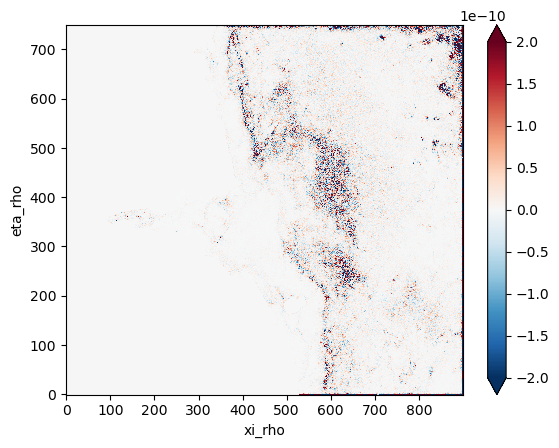

In [11]:
salt_vadv_int.mean(dim='ocean_time').plot(vmin=-2e-10,vmax=2e-10,cmap='RdBu_r')

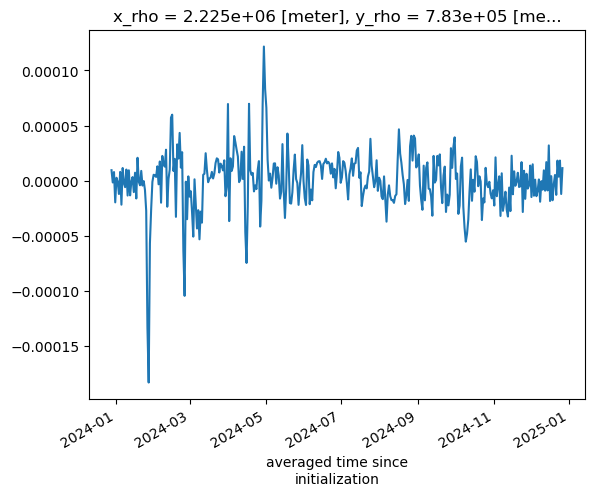

In [12]:
(salt_hadv_int+salt_vadv_int+salt_hdiff_int+salt_vdiff_int).isel(xi_rho=362,eta_rho=391).plot()

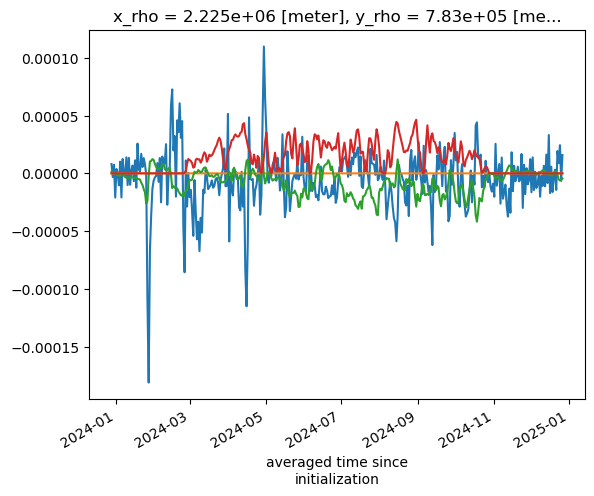

In [13]:
salt_hadv_int.isel(xi_rho=362,eta_rho=391).plot()
salt_vadv_int.isel(xi_rho=362,eta_rho=391).plot()
salt_hdiff_int.isel(xi_rho=362,eta_rho=391).plot()
salt_vdiff_int.isel(xi_rho=362,eta_rho=391).plot()

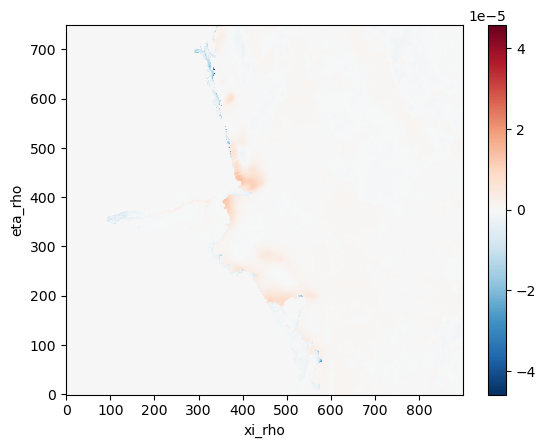

In [14]:
salt_vdiff_int.mean(dim='ocean_time').plot()#vmin=-2e-5,vmax=2e-5,cmap='RdBu')

In [15]:
ds_his = xr.open_dataset('/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl_diags/roms_his_0018.nc')
ssflux = ds_his["ssflux"] 
ds_his.close()

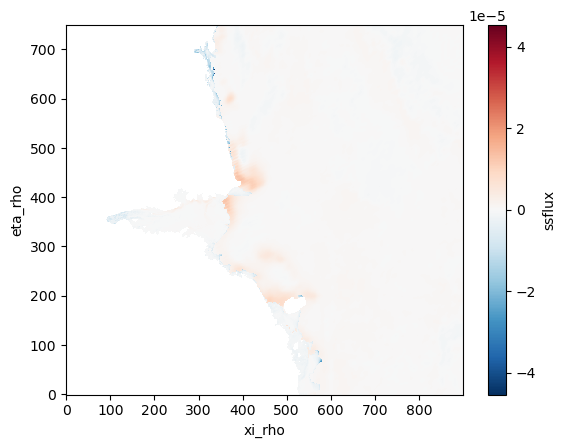

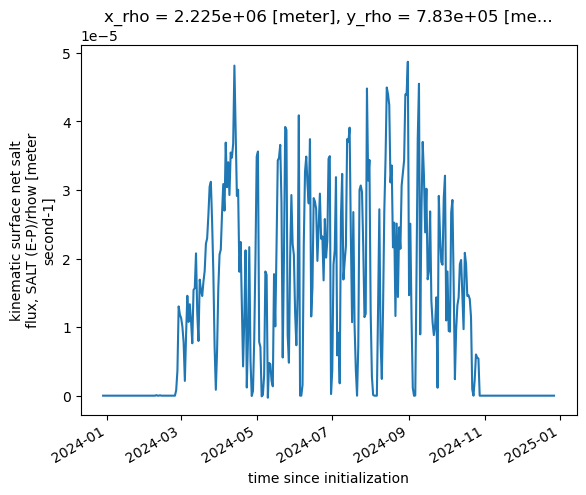

In [16]:
ssflux.mean(dim='ocean_time').plot()
plt.show()
ssflux.isel(xi_rho=362,eta_rho=391).plot()

Text(0.01, 0.99, 'b  mean salinity vertical diffusion')

<Figure size 640x480 with 0 Axes>

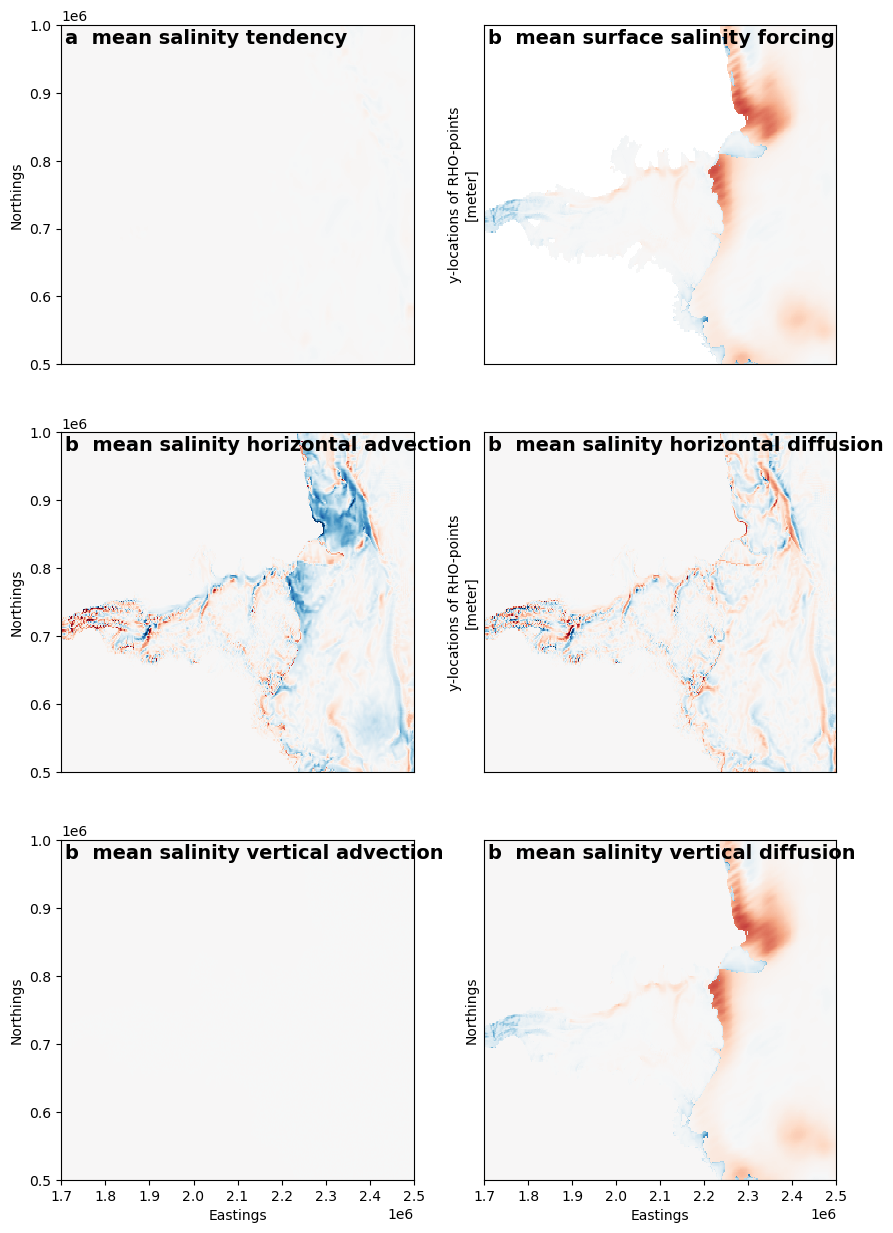

In [17]:

gs = gridspec.GridSpec(nrows=3,ncols=2,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,15])
ax = None

ax=fig.add_subplot(gs[0,0])
(salt_hadv_int+salt_vadv_int+salt_hdiff_int+salt_vdiff_int).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('Northings')
ax.text(0.01, 0.99, 'a  mean salinity tendency', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')


ax=fig.add_subplot(gs[0,1])
ssflux.mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlabel('')
ax.text(0.01, 0.99, 'b  mean surface salinity forcing', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')

ax=fig.add_subplot(gs[1,0])
salt_hadv_int.mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('Northings')
ax.text(0.01, 0.99, 'b  mean salinity horizontal advection', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')

ax=fig.add_subplot(gs[1,1])
salt_hdiff_int.mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlabel('')
ax.text(0.01, 0.99, 'b  mean salinity horizontal diffusion', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')

ax=fig.add_subplot(gs[2,0])
salt_vadv_int.mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xlabel('Eastings')
ax.set_ylabel('Northings')
ax.text(0.01, 0.99, 'b  mean salinity vertical advection', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')

ax=fig.add_subplot(gs[2,1])
salt_vdiff_int.mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlabel('Eastings')
ax.set_ylabel('Northings')
ax.text(0.01, 0.99, 'b  mean salinity vertical diffusion', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')


Text(0.01, 0.99, 'a  mean salinity tendency')

<Figure size 640x480 with 0 Axes>

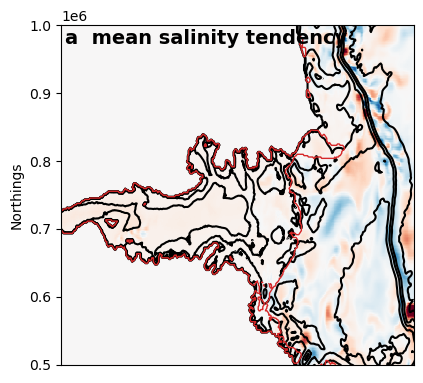

In [18]:

gs = gridspec.GridSpec(nrows=3,ncols=2,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,15])
ax = None

ax=fig.add_subplot(gs[0,0])
(salt_hadv_int+salt_vadv_int+salt_hdiff_int+salt_vdiff_int).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-1e-6,vmax=1e-6,cmap='RdBu_r',add_colorbar=False)
co2 = (grd.h*grd.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co3 = ax.contour(grd.x_rho,grd.y_rho,grd.zice*grd.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('Northings')
ax.text(0.01, 0.99, 'a  mean salinity tendency', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')

<Figure size 640x480 with 0 Axes>

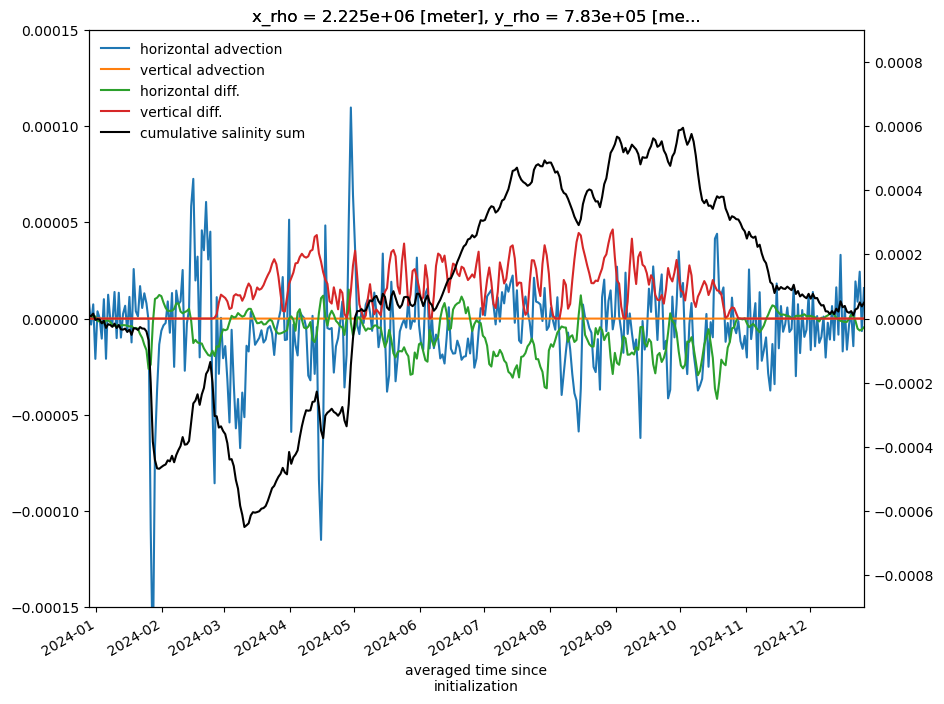

In [19]:

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,7.5])
ax = None

ax=fig.add_subplot(gs[0,0])

salt_hadv_int.isel(xi_rho=362,eta_rho=391).plot(x='ocean_time',label='horizontal advection')
salt_vadv_int.isel(xi_rho=362,eta_rho=391).plot(x='ocean_time',label='vertical advection')
salt_hdiff_int.isel(xi_rho=362,eta_rho=391).plot(x='ocean_time',label='horizontal diff.')
salt_vdiff_int.isel(xi_rho=362,eta_rho=391).plot(x='ocean_time',label='vertical diff.')
ax.set_ylim(-1.5e-4,1.5e-4)

ax2 = ax.twinx()
np.cumsum((salt_hadv_int+salt_vadv_int+salt_hdiff_int+salt_vdiff_int).isel(xi_rho=362,eta_rho=391)).plot(ax=ax2,label='cumulative salinity sum',color='k')
ax2.set_ylim(-9e-4,9e-4)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,frameon=False)
ax.autoscale(enable=True, axis='x', tight=True)

<Figure size 640x480 with 0 Axes>

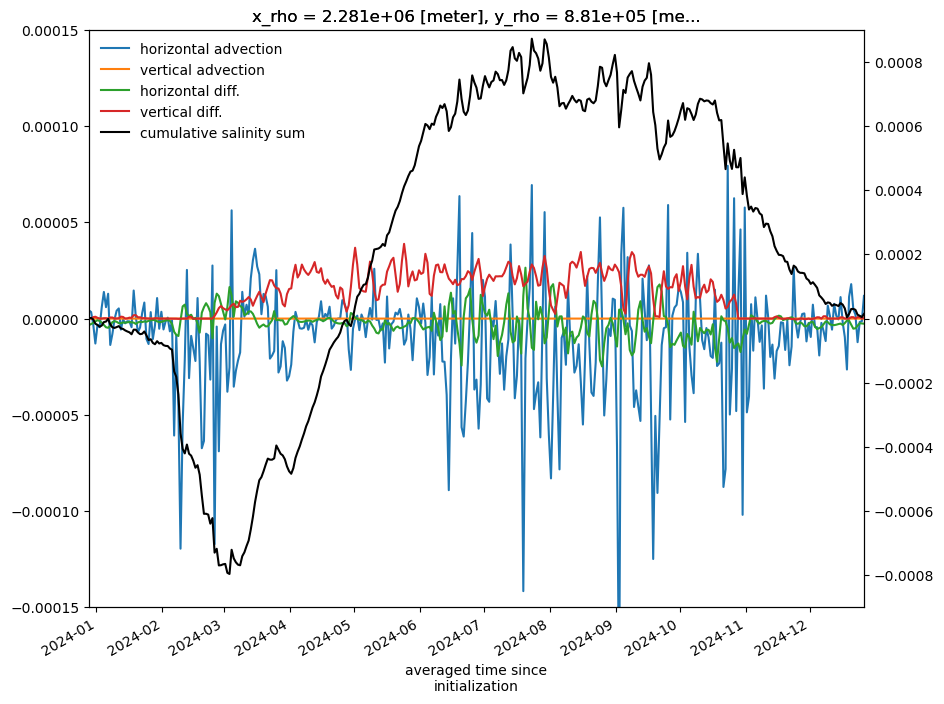

In [20]:

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,7.5])
ax = None

ax=fig.add_subplot(gs[0,0])

salt_hadv_int.isel(xi_rho=390,eta_rho=440).plot(x='ocean_time',label='horizontal advection')
salt_vadv_int.isel(xi_rho=390,eta_rho=440).plot(x='ocean_time',label='vertical advection')
salt_hdiff_int.isel(xi_rho=390,eta_rho=440).plot(x='ocean_time',label='horizontal diff.')
salt_vdiff_int.isel(xi_rho=390,eta_rho=440).plot(x='ocean_time',label='vertical diff.')
ax.set_ylim(-1.5e-4,1.5e-4)

ax2 = ax.twinx()
np.cumsum((salt_hadv_int+salt_vadv_int+salt_hdiff_int+salt_vdiff_int).isel(xi_rho=390,eta_rho=440)).plot(ax=ax2,label='cumulative salinity sum',color='k')
ax2.set_ylim(-9e-4,9e-4)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,frameon=False)
ax.autoscale(enable=True, axis='x', tight=True)

Text(0.01, 0.99, 'b  mean salinity horizontal diffusion')

<Figure size 640x480 with 0 Axes>

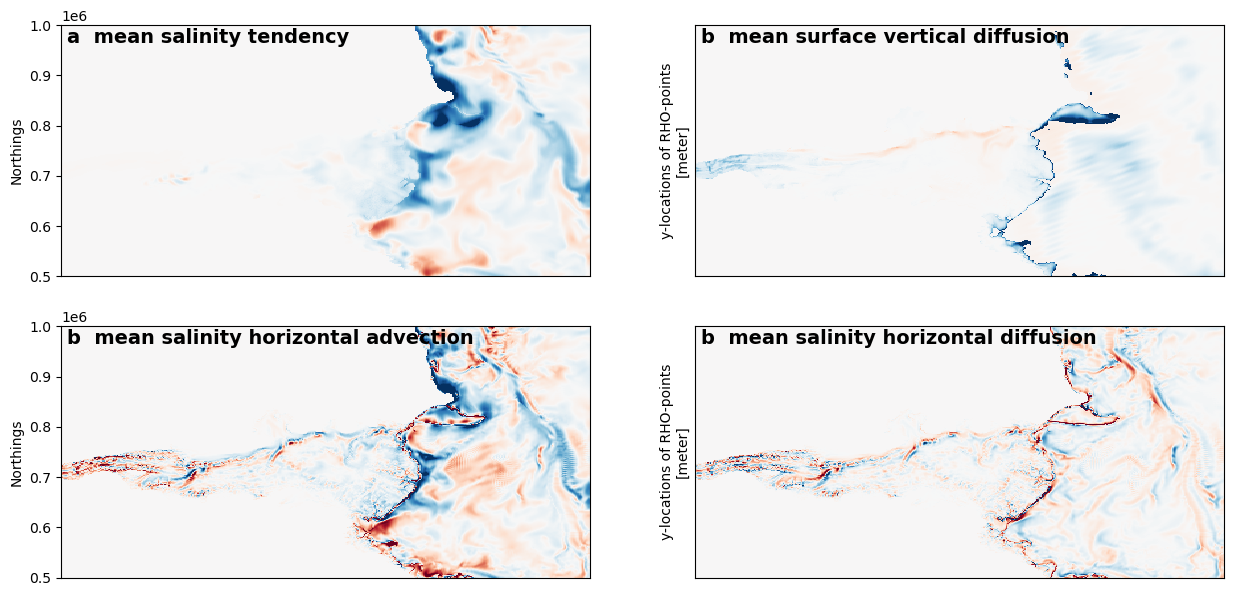

In [21]:

gs = gridspec.GridSpec(nrows=4,ncols=2,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,15])
ax = None

ax=fig.add_subplot(gs[0,0])
(salt_hadv_int+salt_vadv_int+salt_hdiff_int+salt_vdiff_int).sel(ocean_time=slice('2024-02-01','2024-03-01')).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('Northings')
ax.text(0.01, 0.99, 'a  mean salinity tendency', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')


ax=fig.add_subplot(gs[0,1])
salt_vdiff_int.sel(ocean_time=slice('2024-02-01','2024-03-01')).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlabel('')
ax.text(0.01, 0.99, 'b  mean surface vertical diffusion', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')

ax=fig.add_subplot(gs[1,0])
salt_hadv_int.sel(ocean_time=slice('2024-02-01','2024-03-01')).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('Northings')
ax.text(0.01, 0.99, 'b  mean salinity horizontal advection', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')

ax=fig.add_subplot(gs[1,1])
salt_hdiff_int.sel(ocean_time=slice('2024-02-01','2024-03-01')).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',vmin=-2e-5,vmax=2e-5,cmap='RdBu_r',add_colorbar=False)
ax.set_xlim(1.7e6,2.5e6)
ax.set_ylim(.5e6,1e6)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlabel('')
ax.text(0.01, 0.99, 'b  mean salinity horizontal diffusion', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')


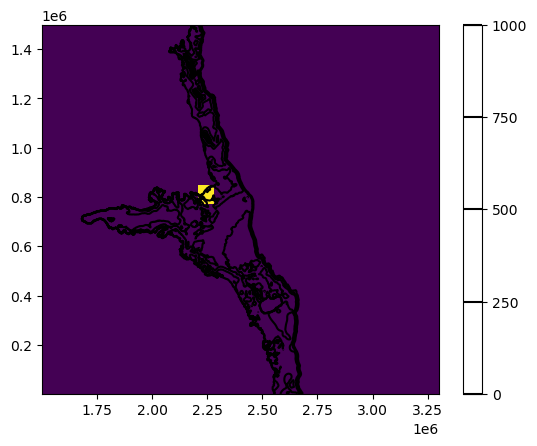

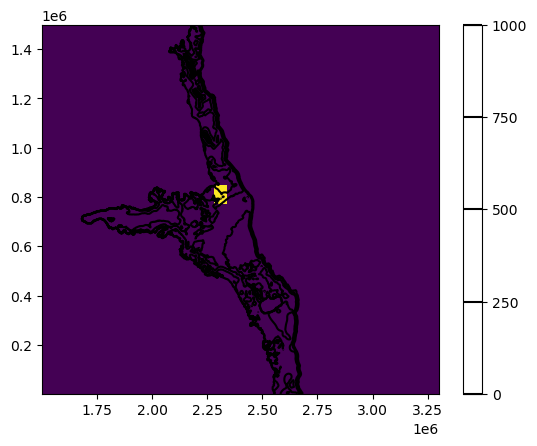

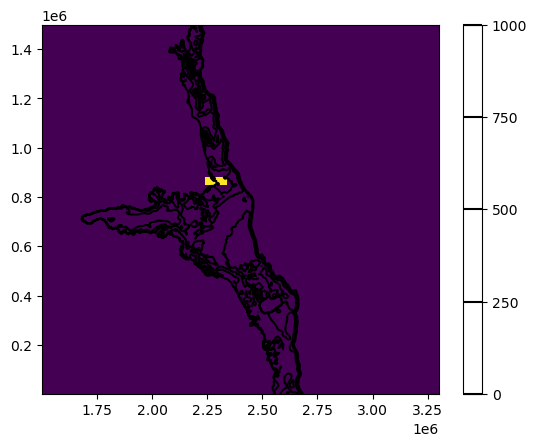

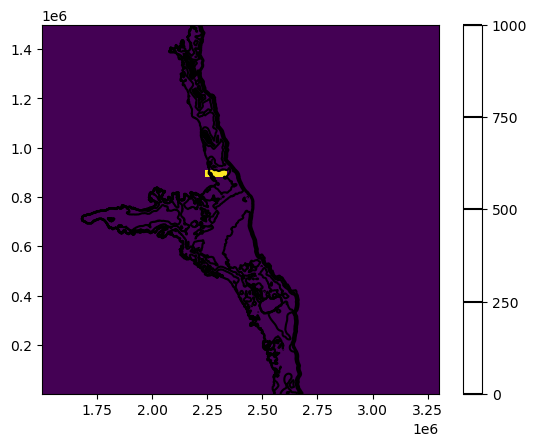

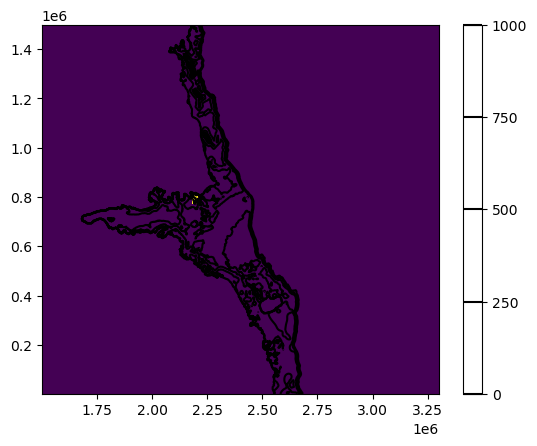

In [22]:
# make masks for salt box

pnt_bl=(2.21e6,.77e6)
pnt_tr=(2.28e6,.85e6)


# make a mask for where we want to include in the average
mask_mac = np.zeros_like(grd.lon_rho)
mask_mac[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_mac)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



pnt_bl=(2.28e6,.77e6)
pnt_tr=(2.34e6,.85e6)


# make a mask for where we want to include in the average
mask_cdit = np.zeros_like(grd.lon_rho)
mask_cdit[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_cdit)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



pnt_bl=(2.24e6,.85e6)
pnt_tr=(2.34e6,.88e6)


# make a mask for where we want to include in the average
mask_cdpe = np.zeros_like(grd.lon_rho)
mask_cdpe[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_cdpe)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()


pnt_bl=(2.24e6,.88e6)
pnt_tr=(2.34e6,.91e6)


# make a mask for where we want to include in the average
mask_cdpw = np.zeros_like(grd.lon_rho)
mask_cdpw[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_cdpw)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



pnt_bl=(2.18e6,.77e6)
pnt_tr=(2.21e6,.81e6)


# make a mask for where we want to include in the average
mask_aiso = np.zeros_like(grd.lon_rho)
mask_aiso[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_aiso)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



In [83]:
((ssflux*(1/grd.pm*1/grd.pn)*mask_mac)).sum(('xi_rho','eta_rho'))

<xarray.DataArray (ocean_time: 365)>
array([ 1.16254252e+02, -2.21145636e+02, -1.96288034e+02, -6.60201640e+01,
       -6.23903262e+01, -1.49007497e+02, -1.94266431e+02, -2.33764735e+02,
       -2.16591173e+02, -2.89527578e+02, -4.31130835e+02, -2.38675828e+02,
       -2.08738653e+02, -6.87008846e+02, -4.21676608e+02, -3.13978440e+02,
       -6.00984340e+02, -7.48170010e+02, -7.75298740e+02, -8.45076558e+02,
       -8.16369039e+02, -1.42159900e+03, -1.58633677e+03, -1.61723703e+03,
       -2.31380846e+03, -2.84638401e+03, -3.12352102e+03, -4.49547180e+03,
       -5.61782260e+03, -1.00829168e+04, -1.64731032e+04, -2.24945487e+04,
       -3.35013672e+04, -3.56698442e+04, -3.75451271e+04, -3.39864740e+04,
       -3.01480040e+04, -2.35913052e+04, -2.71611383e+04, -2.20463312e+04,
       -2.34280682e+04, -2.10004674e+04, -1.95069529e+04, -3.60734991e+04,
       -2.25896857e+04, -1.94801219e+04, -1.88294628e+04, -1.86266461e+04,
       -2.15766002e+04, -2.70732585e+04, -2.65740038e+04, -2.60069907e+04,
       -2.69633139e+04, -2.75201834e+04, -2.63894855e+04, -2.27140934e+04,
       -2.03510912e+04, -2.80375651e+04, -2.46881732e+04, -2.22517546e+04,
       -1.44717896e+04,  7.39707551e+03,  8.83821968e+03,  4.41204415e+03,
        1.84989869e+03,  4.16149792e+03, -6.97336491e+03,  5.61498200e+03,
        1.85587762e+04,  8.49688184e+03,  1.03001243e+04,  8.89186508e+03,
        1.73590035e+03,  1.53749722e+04,  2.02155523e+04,  2.98809091e+04,
        1.50325118e+04,  7.01823945e+03,  2.54308958e+04,  2.32588289e+04,
...
        2.71357295e+04,  3.14375231e+04,  2.25759335e+04,  9.50659285e+03,
        2.79263165e+04,  3.01547261e+04,  2.42773333e+04,  2.63260658e+04,
        2.36948141e+04,  2.02847727e+04,  2.53730225e+03,  1.55493138e+03,
        2.16094038e+03,  5.59389741e+03,  5.30262719e+03,  6.47817597e+03,
        1.41121935e+03,  1.13017790e+03,  1.16978138e+03,  1.30458551e+03,
        1.44141104e+03,  1.45414055e+03,  1.65260141e+03,  1.63283702e+03,
        1.38891660e+03,  1.32503668e+03,  1.32138320e+03,  1.50121451e+03,
       -2.28081714e+03,  1.09522042e+03,  1.22490436e+03,  1.21046337e+03,
        1.11198990e+03,  1.00526571e+03,  9.58823494e+02,  9.38156964e+02,
        7.90543303e+02,  6.68486779e+02,  7.15652530e+02,  6.45403579e+02,
        6.27650939e+02,  5.36639753e+02,  3.74801676e+02,  5.84122051e+02,
        4.25120485e+02,  3.77894994e+02,  2.59913232e+02,  2.93350058e+02,
        2.31016743e+02,  2.51460515e+02,  2.72762621e+02,  2.42153724e+02,
        4.00170922e+02,  3.96738429e+02,  4.96536223e+02,  3.54241220e+02,
        3.47071523e+02,  4.29458733e+02,  3.51030379e+02,  3.19485340e+02,
        2.91081768e+02,  3.15020819e+02,  2.70034244e+02,  3.00256207e+02,
        2.71868052e+02,  4.05372684e+02,  3.70990974e+02,  2.94880675e+02,
        2.07240043e+02,  2.42270705e+02,  2.03119404e+02,  2.09727139e+02,
        1.29124390e+02,  8.24645001e+01,  1.52218682e+02,  4.82706883e+01,
       -5.76968259e+01])
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2023-12-29 2023-12-30 ... 2024-12-27

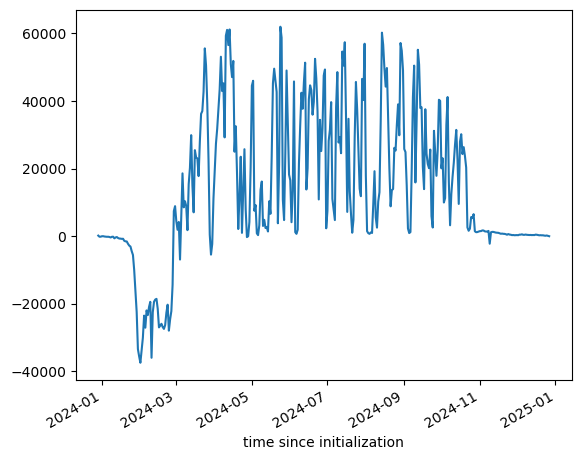

In [120]:
( ((ssflux*(1/grd.pm*1/grd.pn)*mask_mac)).sum(('xi_rho','eta_rho')) ).plot()

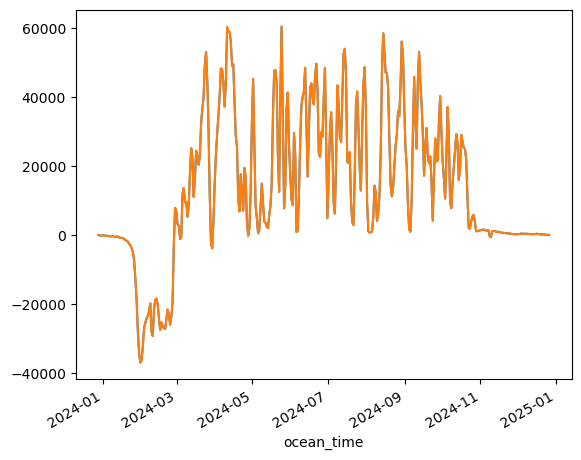

In [121]:
(salt_vdiff_int).where(mask_mac==1).weighted(weights).sum(('xi_rho','eta_rho')).plot(x='ocean_time',label='vertical diff.')
(salt_vdiff_int).weighted((weights*mask_mac).fillna(0)).sum(('xi_rho','eta_rho')).plot(x='ocean_time',label='vertical diff.')


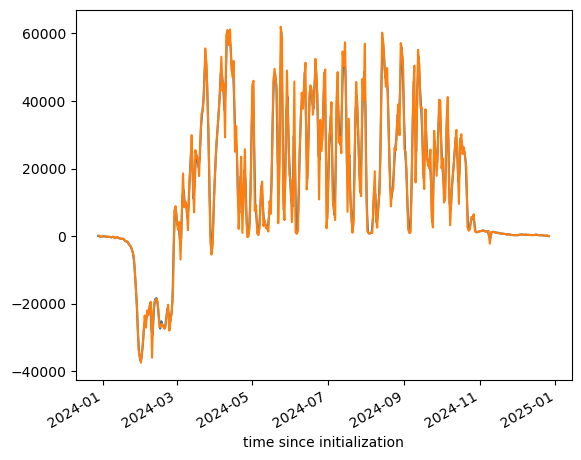

In [110]:
(salt_vdiff_int).where(mask_mac==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='vertical diff.')
( ((ssflux*(1/grd.pm*1/grd.pn)*mask_mac)).sum(('xi_rho','eta_rho'))).plot()

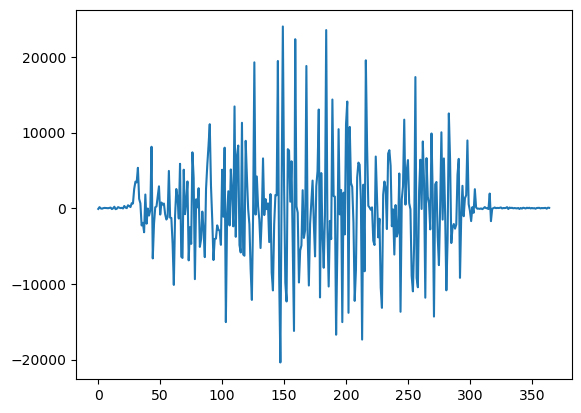

In [118]:
plt.plot( (salt_vdiff_int).where(mask_mac==1).weighted(weights).sum(('xi_rho','eta_rho')).values -  ((ssflux*(1/grd.pm*1/grd.pn)*mask_mac)).sum(('xi_rho','eta_rho')).values )

<Figure size 640x480 with 0 Axes>

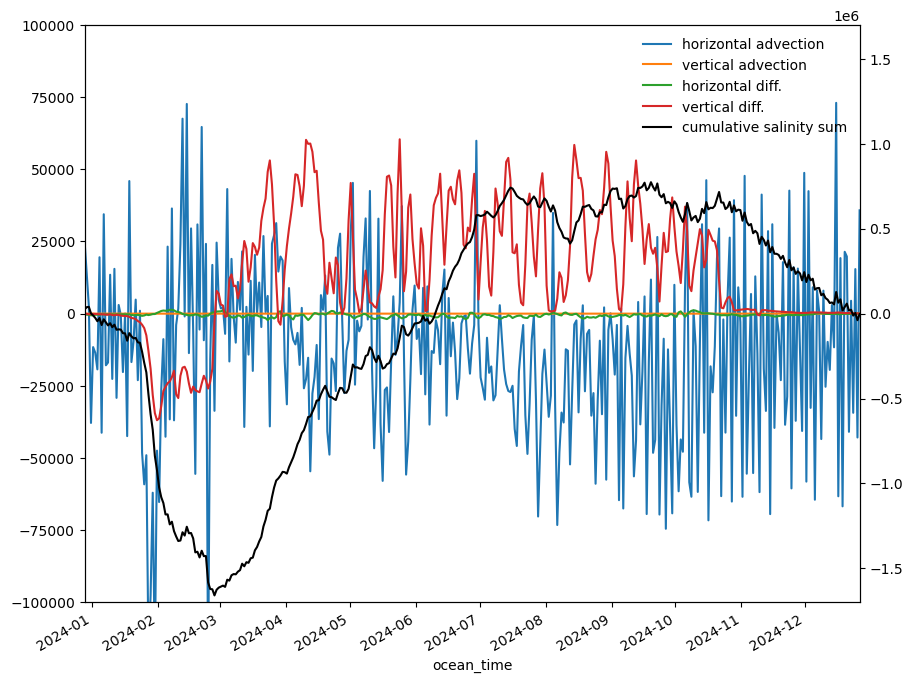

In [129]:

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,7.5])
ax = None

ax=fig.add_subplot(gs[0,0])
maskit = mask_mac
salt_hadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='horizontal advection')
salt_vadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='vertical advection')
salt_hdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='horizontal diff.')
salt_vdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='vertical diff.')
ax.set_ylim(-1e5,1e5)

ax2 = ax.twinx()
np.cumsum((salt_hadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_vadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_hdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_vdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True))).plot(ax=ax2,label='cumulative salinity sum',color='k')
ax2.set_ylim(-1.7e6,1.7e6)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,frameon=False)
ax.autoscale(enable=True, axis='x', tight=True)

<Figure size 640x480 with 0 Axes>

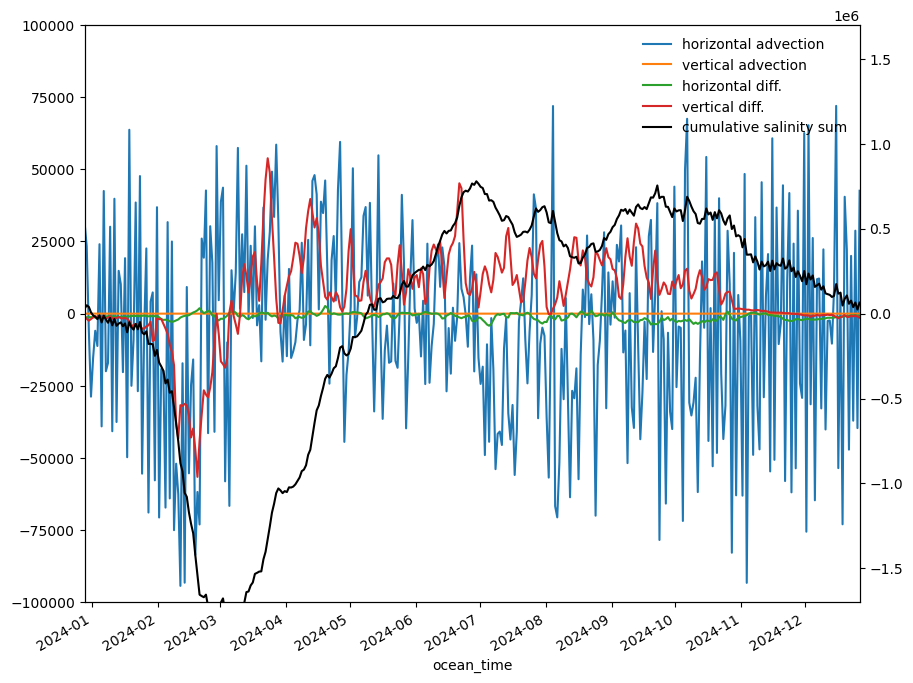

In [130]:

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,7.5])
ax = None

ax=fig.add_subplot(gs[0,0])
maskit = mask_cdit
salt_hadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='horizontal advection')
salt_vadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='vertical advection')
salt_hdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='horizontal diff.')
salt_vdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='vertical diff.')
ax.set_ylim(-1e5,1e5)

ax2 = ax.twinx()
np.cumsum((salt_hadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_vadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_hdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_vdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True))).plot(ax=ax2,label='cumulative salinity sum',color='k')
ax2.set_ylim(-1.7e6,1.7e6)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,frameon=False)
ax.autoscale(enable=True, axis='x', tight=True)

<Figure size 640x480 with 0 Axes>

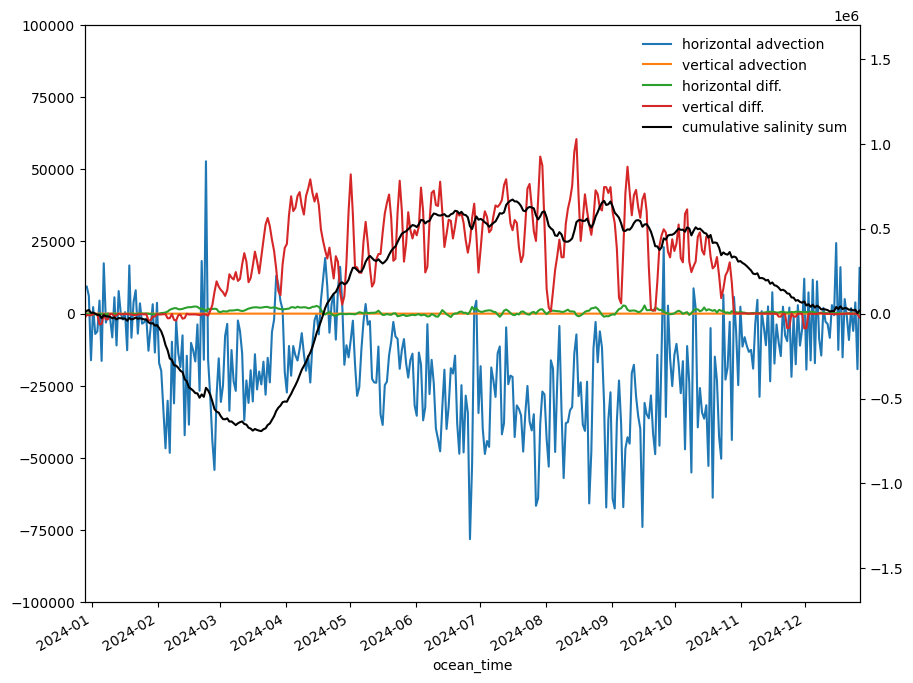

In [131]:

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,7.5])
ax = None

ax=fig.add_subplot(gs[0,0])
maskit = mask_cdpe
salt_hadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='horizontal advection')
salt_vadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='vertical advection')
salt_hdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='horizontal diff.')
salt_vdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='vertical diff.')
ax.set_ylim(-1e5,1e5)

ax2 = ax.twinx()
np.cumsum((salt_hadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_vadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_hdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_vdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True))).plot(ax=ax2,label='cumulative salinity sum',color='k')
ax2.set_ylim(-1.7e6,1.7e6)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,frameon=False)
ax.autoscale(enable=True, axis='x', tight=True)

<Figure size 640x480 with 0 Axes>

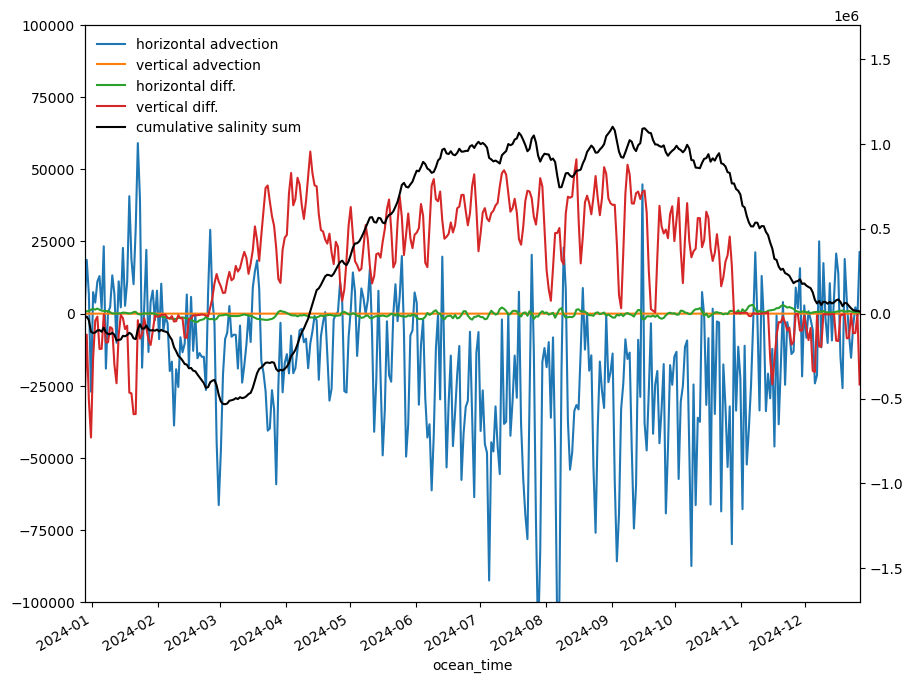

In [132]:

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,7.5])
ax = None

ax=fig.add_subplot(gs[0,0])
maskit = mask_cdpw
salt_hadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='horizontal advection')
salt_vadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='vertical advection')
salt_hdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='horizontal diff.')
salt_vdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True).plot(x='ocean_time',label='vertical diff.')
ax.set_ylim(-1e5,1e5)

ax2 = ax.twinx()
np.cumsum((salt_hadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_vadv_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_hdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True)+
           salt_vdiff_int.where(maskit==1).weighted(weights).sum(('xi_rho','eta_rho'),skipna=True))).plot(ax=ax2,label='cumulative salinity sum',color='k')
ax2.set_ylim(-1.7e6,1.7e6)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,frameon=False)
ax.autoscale(enable=True, axis='x', tight=True)

In [23]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
# load single ROMS netcdf with xr
# ds = xr.open_dataset('/g/data/jk72/deg581/apom/ana/data/proc/roms_v11_ctrl_dia_0018-19_5daymn_full.nc')
data_set_path = '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl_diags/roms_dia_0018.nc'
ds = xr.open_dataset(data_set_path)

grd = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_v12_grd.nc')

grd['hc']=ds.hc
grd['s_w']=ds.s_w
grd['s_rho']=ds.s_rho
grd['Cs_w']=ds.Cs_w
grd['Cs_r']=ds.Cs_r

grd = grd.assign_coords({"x_rho": grd.x_rho})
grd = grd.assign_coords({"y_rho": grd.y_rho})
grd = grd.assign_coords({"lon_rho": grd.lon_rho})
grd = grd.assign_coords({"lat_rho": grd.lat_rho})

# ds_raw = ds_raw.assign_coords(lon_rho=grd.lon_rho)
# ds_raw = ds_raw.assign_coords(lat_rho=grd.lat_rho)

grd['mask_zice'] = (grd.mask_rho.where(grd.zice<0)==1) # make a logic mask for ice
grd['mask_zice_nan'] = (grd.mask_rho.where(grd.zice<0)==1).where(grd.mask_rho.where(grd.zice<0)==1) # make a mask where non-ice is nan

def loadDataSet(path):
    ds = xr.open_dataset(path)
    return ds

In [ ]:
# ds = loadDataSet(data_set_path)
# ds_salt_rate = ds['salt_rate']
# ds_salt_rate.load()
# print('loaded ',ds_salt_rate.nbytes/1e9,'G')

In [ ]:
%%time

ds = loadDataSet(data_set_path)
salt_hadv = ds['salt_hadv']
salt_hadv.load()
print('loaded ',salt_hadv.nbytes/1e9,'G')

ds = loadDataSet(data_set_path)
salt_vadv = ds['salt_vadv']
salt_vadv.load()
print('loaded ',salt_vadv.nbytes/1e9,'G')

ds = loadDataSet(data_set_path)
salt_hdiff = ds['salt_hdiff']
salt_hdiff.load()
print('loaded ',salt_hdiff.nbytes/1e9,'G')

ds = loadDataSet(data_set_path)
salt_vdiff = ds['salt_vdiff']
salt_vdiff.load()
print('loaded ',salt_vdiff.nbytes/1e9,'G')

# ds = loadDataSet(data_set_path)
# ds_salt_rate = ds['salt_rate']
# ds_salt_rate.load()
# print('loaded ',ds_salt_rate.nbytes/1e9,'G')

In [ ]:
%%time
ds = loadDataSet(data_set_path)
zeta = ds['zeta']
zeta.load()
print('loaded ',zeta.nbytes/1e9,'G')

In [ ]:
%%time
hwater = grd.h- abs(grd.zice) # replace ds.h for hwater below
Zo_rho = (grd.hc * grd.s_rho + grd.Cs_r * hwater) / (grd.hc + hwater)
z_rho = zeta + (zeta + hwater) * Zo_rho 

Zo_w = (grd.hc * grd.s_w + grd.Cs_w * hwater) / (grd.hc + hwater)
z_w = zeta + (zeta + hwater) * Zo_w 


Z_w = z_w.transpose('ocean_time','s_w','eta_rho','xi_rho')
print(z_w.shape, Z_w.shape)
dz = np.diff(Z_w,axis=1)

In [ ]:
1+1

In [ ]:
del zeta, Z_w, hwater, z_w
ds.close()

In [ ]:
%%time 

salt_hadv_dz = salt_hadv*dz
print('loaded salt_hadv_dz ',salt_hadv_dz.nbytes/1e9,'G')
del salt_hadv

salt_vadv_dz = salt_vadv*dz
print('loaded salt_vadv_dz ',salt_hadv_dz.nbytes/1e9,'G')
del salt_vadv

salt_hdiff_dz = salt_hdiff*dz
print('loaded salt_hdiff_dz ',salt_hadv_dz.nbytes/1e9,'G')
del salt_hdiff

salt_vdiff_dz = salt_vdiff*dz
print('loaded salt_vdiff_dz ',salt_hadv_dz.nbytes/1e9,'G')

del salt_vdiff,dz

In [ ]:
# %%time

# # calculate dz

# ds = loadDataSet(data_set_path)

# print("Vtransform=2")
# #  New formulation (Vtransform(ng) = 2):
# #
# #         z_w(x,y,s,t) = zeta(x,y,t) + [zeta(x,y,t)+ h(x,y)] * Zo_w
# #                 Zo_w = [hc * s(k) + C(k) * h(x,y)] / [hc + h(x,y)]
# hwater = ds.h- abs(ds.zice) # replace ds.h for hwater below
# Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * hwater) / (ds.hc + hwater)
# z_rho = ds.zeta + (ds.zeta + hwater) * Zo_rho 

# Zo_w = (ds.hc * ds.s_w + ds.Cs_w * hwater) / (ds.hc + hwater)
# z_w = ds.zeta + (ds.zeta + hwater) * Zo_w 

# ds.close()


# Z_w = z_w.transpose('ocean_time','s_w','eta_rho','xi_rho')
# print(z_w.shape, Z_w.shape)
# dz = np.diff(Z_w,axis=1)

# # dz.load()

In [ ]:
# %%time

# ds = loadDataSet(data_set_path)
# salt_hadv = ds['salt_hadv']
# salt_hadv.load()
# print('loaded ',salt_hadv.nbytes/1e9,'G')

# ds = loadDataSet(data_set_path)
# salt_vadv = ds['salt_vadv']
# salt_vadv.load()
# print('loaded ',salt_vadv.nbytes/1e9,'G')

# ds = loadDataSet(data_set_path)
# salt_hdiff = ds['salt_hdiff']
# salt_hdiff.load()
# print('loaded ',salt_hdiff.nbytes/1e9,'G')

# ds = loadDataSet(data_set_path)
# salt_vdiff = ds['salt_vdiff']
# salt_vdiff.load()
# print('loaded ',salt_vdiff.nbytes/1e9,'G')

# # ds = loadDataSet(data_set_path)
# # salt_rate = ds['salt_rate']
# # salt_rate.load()
# # print('loaded ',salt_rate.nbytes/1e9,'G')

In [ ]:
# %%time 

# salt_hadv_dz = salt_hadv*dz

# salt_vadv_dz = salt_vadv*dz

# salt_hdiff_dz = salt_hdiff*dz

# salt_vdiff_dz = salt_vdiff*dz


In [ ]:
# ds = ds.drop_vars(['temp_xadv','temp_yadv','temp_xdiff','temp_ydiff','salt_xadv','salt_yadv','salt_xdiff','salt_ydiff','temp_sdiff','salt_sdiff'])
# ds = ds.drop_vars(['temp_rate','temp_hadv','temp_vadv','temp_hdiff','temp_vdiff','zeta'])
# print(ds.nbytes/1e9,'G')
# ds

In [ ]:
# # chop in time, selecting a smaller segment
# ds = ds.sel(ocean_time=slice('2023-01-01','2025-01-01'))

In [ ]:
# make masks

# now make a ROI mask(s)
# plt.figure(figsize=(6,4))
# grd.mask_zice.plot(x='x_rho',y='y_rho')
# plt.grid()
poly_shelf = np.array([
    [1.55e6,600000],
    [2.25e6,600000],
    [2.25e6,800000],
    [2.20e6,830000],
    [1.55e6,890000]])
# plt.plot(poly_shelf[:,0],poly_shelf[:,1])
# plt.show()

def inpolygon(xq, yq, xv, yv):
    from matplotlib import path
    shape = xq.shape
    xq = xq.reshape(-1)
    yq = yq.reshape(-1)
    xv = xv.reshape(-1)
    yv = yv.reshape(-1)
    q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
    p = path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
    return p.contains_points(q).reshape(shape)


mask_roi = inpolygon(grd.x_rho.values, grd.y_rho.values,poly_shelf[:,0], poly_shelf[:,1])


grd['mask_zice_roi'] = grd.mask_zice*mask_roi
# grd.mask_zice_roi.plot()
roi_label1 = 'amery'
grd.mask_zice_roi.attrs['long_name']=roi_label1

weights = (1/grd.pm)*(1/grd.pn)
weights.name = "weights"

In [ ]:
from matplotlib.patches import Rectangle

#%matplotlib widget

plt.figure(figsize=(10,10)),
# grd.my_doy.mean(dim='dayofyear').plot(x='x_rho',y='y_rho',cmap='RdBu',vmin=0,vmax=10)
grd.h.plot.contour(x='x_rho',y='y_rho',levels=(0,100,200,300,400,500),colors='k')
(-1*grd.zice*grd.mask_rho).plot.contour(x='x_rho',y='y_rho',levels=(0,1),colors='r')

pnt_bl=(2.21e6,.77e6)
pnt_tr=(2.28e6,.85e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))

pnt_bl=(2.28e6,.77e6)
pnt_tr=(2.34e6,.85e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))

pnt_bl=(2.24e6,.85e6)
pnt_tr=(2.34e6,.88e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))

pnt_bl=(2.24e6,.88e6)
pnt_tr=(2.34e6,.91e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))



pnt_bl=(2.18e6,.77e6)
pnt_tr=(2.21e6,.81e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))




%matplotlib inline

In [ ]:
# make masks for salt box

pnt_bl=(2.21e6,.77e6)
pnt_tr=(2.28e6,.85e6)


# make a mask for where we want to include in the average
mask_mac = np.zeros_like(grd.lon_rho)
mask_mac[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_mac)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



pnt_bl=(2.28e6,.77e6)
pnt_tr=(2.34e6,.85e6)


# make a mask for where we want to include in the average
mask_cdit = np.zeros_like(grd.lon_rho)
mask_cdit[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_cdit)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



pnt_bl=(2.24e6,.85e6)
pnt_tr=(2.34e6,.88e6)


# make a mask for where we want to include in the average
mask_cdpe = np.zeros_like(grd.lon_rho)
mask_cdpe[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_cdpe)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()


pnt_bl=(2.24e6,.88e6)
pnt_tr=(2.34e6,.91e6)


# make a mask for where we want to include in the average
mask_cdpw = np.zeros_like(grd.lon_rho)
mask_cdpw[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_cdpw)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



pnt_bl=(2.18e6,.77e6)
pnt_tr=(2.21e6,.81e6)


# make a mask for where we want to include in the average
mask_aiso = np.zeros_like(grd.lon_rho)
mask_aiso[(grd.x_rho > pnt_bl[0]) & (grd.x_rho < pnt_tr[0]) & (grd.y_rho > pnt_bl[1]) & (grd.y_rho < pnt_tr[1])]=1

plt.pcolormesh(grd.x_rho,grd.y_rho,mask_aiso)
plt.contour(grd.x_rho,grd.y_rho,grd.h*grd.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



In [ ]:
# salt_rate.isel(xi_rho=362,eta_rho=391).sum(dim='s_rho').plot()
(salt_hadv_dz+salt_vadv_dz+salt_hdiff_dz+salt_vdiff_dz).isel(xi_rho=362,eta_rho=391).sum(dim='s_rho').plot()

In [ ]:
(salt_hadv_dz).isel(xi_rho=362,eta_rho=391).sum(dim='s_rho').plot()
salt_vadv_dz.isel(xi_rho=362,eta_rho=391).sum(dim='s_rho').plot()
salt_hdiff_dz.isel(xi_rho=362,eta_rho=391).sum(dim='s_rho').plot()
salt_vdiff_dz.isel(xi_rho=362,eta_rho=391).sum(dim='s_rho').plot()

In [ ]:
salt_hdiff_dz.isel(xi_rho=362,eta_rho=391).sum(dim='s_rho').plot()
salt_vdiff_dz.isel(xi_rho=362,eta_rho=391).sum(dim='s_rho').plot()

In [ ]:
salt_vdiff_dz.sum(dim='s_rho').mean(dim='ocean_time').plot()

In [ ]:
ds_his = xr.open_dataset('/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl_diags/roms_his_0018.nc')
ssflux = ds_his["ssflux"] 
ds_his.close()

In [ ]:
ssflux.mean(dim='ocean_time').plot()

In [ ]:
STOP

In [ ]:
ds.salt

In [ ]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=2,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')

ax=fig.add_subplot(gs[1,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

In [ ]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=2,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')

ax=fig.add_subplot(gs[1,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

In [ ]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=2,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')

ax=fig.add_subplot(gs[1,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

In [ ]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=3,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)


plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')
cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'salinity')

ax=fig.add_subplot(gs[1,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)


plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'pot temp')

ax=fig.add_subplot(gs[2,0])
plt.plot(ds.ocean_time,ds.shflux.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),'C1')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylim((-200,200))
ax2 = ax.twinx()
ax2.plot(ds.ocean_time,ds.ssflux.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),'C0')
ax2.autoscale(enable=True, axis='x', tight=True)
# ax2.set_ylim((-2,2))

In [ ]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=3,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')

ax=fig.add_subplot(gs[1,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

ax=fig.add_subplot(gs[2,0])
plt.plot(ds.ocean_time,ds.shflux.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),'C1')
plt.plot(ds.ocean_time,ds.ssflux.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),'C0')

In [ ]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=3,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None


where_x=390
where_e=440

ax=fig.add_subplot(gs[0,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.salt.isel(xi_rho=where_x,eta_rho=where_e).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)


plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.salt.isel(xi_rho=where_x,eta_rho=where_e).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')
cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'salinity')

ax=fig.add_subplot(gs[1,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)


plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,
            [-1.95],colors='C1',linestyles='-')

cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'pot temp')

ax=fig.add_subplot(gs[2,0])
plt.plot(ds.ocean_time,ds.shflux.isel(xi_rho=where_x,eta_rho=where_e),'C1')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylim((-400,200))
ax2 = ax.twinx()
ax2.plot(ds.ocean_time,-ds.ssflux.isel(xi_rho=where_x,eta_rho=where_e),'C0')
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.set_ylim((-4*1e-5,2*1e-5))

In [ ]:
# now make those poster plots again

In [ ]:
# now look at heat coming onto shelf
target_depth = -400

temp400 = grid.transform(ds.temp, 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# salt400_FM = grid.transform(ds.salt, 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()

temp400_clima = temp400.groupby('ocean_time.dayofyear').mean()

In [ ]:
from scipy.ndimage import gaussian_filter1d


temp400.isel(ocean_time=slice(25,85)).mean(dim='ocean_time').plot(vmin=-2,vmax=-.5)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((325,475,225,450))
plt.plot(450,335,'x',color='C1')
plt.plot(408,262,'x',color='C2')
plt.show()

plt.plot(ds.ocean_time,temp400.isel(xi_rho=450,eta_rho=335),color='C1',linewidth=.5,label='400m temp - outer shelf')
plt.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=450,eta_rho=335), 5),color='C1',linewidth=2.5,label='400m temp - outer shelf (5-day filter)')
plt.plot(ds.ocean_time,temp400.isel(xi_rho=408,eta_rho=262),color='C2',linewidth=.5,label='400m temp - coast')
plt.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=408,eta_rho=262), 5),color='C2',linewidth=2.5,label='400m temp - coast (5-day filter)')
plt.show()



In [ ]:
image_save_dpi = 1000

# # plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(temp400_clima.dayofyear,temp400_clima.isel(xi_rho=450,eta_rho=335),color='C1',linewidth=1.5)#,label='400m temp - outer shelf')
ax.plot(temp400_clima.dayofyear,gaussian_filter1d(temp400_clima.isel(xi_rho=450,eta_rho=335), 5),color='C1',linewidth=5,label='400m temp @ outer shelf')
ax.plot(temp400_clima.dayofyear,temp400_clima.isel(xi_rho=408,eta_rho=262),color='lightcoral',linewidth=1.5)#,label='400m temp - coast')
ax.plot(temp400_clima.dayofyear,gaussian_filter1d(temp400_clima.isel(xi_rho=408,eta_rho=262), 5),color='lightcoral',linewidth=5,label='400m temp @ coast')



# ax.annotate("400m temp @ outer shelf",
#             xy=(250,-1), xycoords='data',
#             xytext=(250,-1), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.75))

# # plt.rcParams.update({'font.size': 16})
# # plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'Temperature ($\theta$ $^\circ$C)')
ax.set_xlabel('day of year')
# ax.grid()
ax.legend(frameon=False,loc='upper right')
ax.set_title('')

In [ ]:
# now melt rate variability
ds['m'] = ds.m.where(ds.m<1e35,np.NaN)
ds['my'] = ds.m*(60*60*24*365)
# ds.my.mean(dim='ocean_time').where(ds.zice<-500).plot(vmin=-10,vmax=10)
# time evolution of melt rate

ds['my_doy'] = ds.my.groupby('ocean_time.dayofyear').mean()

In [ ]:
image_save_dpi = 1000

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


(ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C0',linewidth=1.5)#,label='mean melt (zice<500m)')
plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C0',linewidth=5,label='mean melt')
(ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C1',linewidth=1.5)#,label='mean melt (zice>500m)')
plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C1',linewidth=5,label='mean melt (zice>500m)')

# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'melt rate (m/yr)')
ax.set_xlabel('day of year')
# ax.grid()
ax.legend(frameon=False,loc='lower left')
ax.set_title('')


In [ ]:
(ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).mean(dim='dayofyear')


In [ ]:
# isw plume strength
import seawater as sw

sigma_0_surf = sw.pden(ds.salt.isel(s_rho=-1).values,sw.temp(ds.salt.isel(s_rho=-1).values,ds.temp.isel(s_rho=-1).values,ds.z_rho0.isel(s_rho=-1).values),ds.z_rho0.isel(s_rho=-1).values,0)-1000
ds['sigma_0_surf']=(('ocean_time','eta_rho','xi_rho'),sigma_0_surf)


mask = np.zeros_like(ds.lon_rho)
mask[380:386,318:323]=1


ds['sigma_0_surf_clima'] = ds.sigma_0_surf.groupby('ocean_time.dayofyear').mean()

In [ ]:
image_save_dpi = 1000

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')


(ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='orangered',linewidth=1.5)#,label='mean melt (zice<500m)')
plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='orangered',linewidth=5,label='AIS mean melt')
# (ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C1',linewidth=.5)#,label='mean melt (zice>500m)')
# plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C1',linewidth=2,label='mean melt (zice>500m)')


ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin')#, color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(ds.dayofyear,ds.sigma_0_surf_clima.where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')),color='skyblue',linewidth=1.5)
ax2.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_surf_clima.where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')),2),color='skyblue',linewidth=5,label='$\sigma_0$ @ outflow')
ax2.set_ylabel('surface $\sigma_0$ anomay (kg/m$^3$)')



# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'melt rate (m/yr)')
ax.set_xlabel('day of year')
# ax.grid()

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,frameon=False,loc='lower left')

# ax.legend(frameon=False,loc='lower left')
ax.set_title('')



In [ ]:
frc = xr.open_dataset('../../frc/amery_v2km_tamura+era_shflux.nc')



In [ ]:


# make heat flux plot
(frc.shflux*ds.mask_rho*~ds.mask_zice).mean(dim='shf_time').plot(levels=12)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((300,450,350,600))
plt.plot(390,440,'x',color='C1')
plt.plot(362,391,'x',color='C2')

plt.show()

plt.plot(frc.shf_time,frc.shflux.isel(xi_rho=390,eta_rho=440),color='C1',linewidth=.5,label='shflux - CD')
plt.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=390,eta_rho=440), 5),color='C1',linewidth=2.5,label='shflux - CD (5-day filter)')
plt.plot(frc.shf_time,frc.shflux.isel(xi_rho=362,eta_rho=391),color='C2',linewidth=.5,label='shflux - Ma')
plt.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=362,eta_rho=391), 5),color='C2',linewidth=2.5,label='shflux - Ma (5-day filter)')


In [ ]:
image_save_dpi = 1000

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(frc.shf_time,frc.shflux.isel(xi_rho=362,eta_rho=391),color='C2',linewidth=1.5)#,label='shflux - Ma')
ax.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=362,eta_rho=391), 5),color='C2',linewidth=5,label='Mackenzie polynya')
ax.plot(frc.shf_time,frc.shflux.isel(xi_rho=390,eta_rho=440),color='steelblue',linewidth=1.5)#,label='shflux - CD')
ax.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=390,eta_rho=440), 5),color='steelblue',linewidth=5,label='Cape Darnley')



# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'surface heat flux (W/m$^2$)')
ax.set_xlabel('day of year')
# ax.grid()

ax.legend(frameon=False,loc='lower left')
ax.set_title('')



In [ ]:
# make bottom density 
sigma_0_bot = sw.pden(ds.salt.isel(s_rho=0).values,sw.temp(ds.salt.isel(s_rho=0).values,ds.temp.isel(s_rho=0).values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000
ds['sigma_0_bot']=(('ocean_time','eta_rho','xi_rho'),sigma_0_bot)


ds['sigma_0_bot_clima'] = ds.sigma_0_bot.groupby('ocean_time.dayofyear').mean()

In [ ]:
image_save_dpi = 1000

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])



# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=440),color='steelblue',linewidth=1.5)
ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=440), 2),color='steelblue',linewidth=5,label='bottom $\sigma_0$ - Cape Darnley')
# ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462),color='C4',linewidth=.5)
# ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462), 2),color='C4',linewidth=2.5,label='bottom $\sigma_0$ - Burton basin')



# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel('bottom $\sigma_0$ anomaly (kg/m$^3$)')
ax.set_xlabel('day of year')
# ax.grid()

ax.legend(frameon=False,loc='upper left')
ax.set_title('')





In [ ]:
STOP

In [ ]:
# now look at heat coming onto shelf
target_depth = -400

temp400 = grid.transform(ds.temp, 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# salt400_FM = grid.transform(ds.salt, 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()

temp400_clima = temp400.groupby('ocean_time.dayofyear').mean()

In [ ]:
from scipy.ndimage import gaussian_filter1d


temp400.isel(ocean_time=slice(25,85)).mean(dim='ocean_time').plot(vmin=-2,vmax=-.5)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((325,475,225,450))
plt.plot(450,335,'x',color='C1')
plt.plot(408,262,'x',color='C2')
plt.show()

plt.plot(ds.ocean_time,temp400.isel(xi_rho=450,eta_rho=335),color='C1',linewidth=.5,label='400m temp - outer shelf')
plt.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=450,eta_rho=335), 5),color='C1',linewidth=2.5,label='400m temp - outer shelf (5-day filter)')
plt.plot(ds.ocean_time,temp400.isel(xi_rho=408,eta_rho=262),color='C2',linewidth=.5,label='400m temp - coast')
plt.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=408,eta_rho=262), 5),color='C2',linewidth=2.5,label='400m temp - coast (5-day filter)')
plt.show()



In [ ]:
image_save_dpi = 1000

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(temp400_clima.dayofyear,temp400_clima.isel(xi_rho=450,eta_rho=335),color='C1',linewidth=1.5)#,label='400m temp - outer shelf')
ax.plot(temp400_clima.dayofyear,gaussian_filter1d(temp400_clima.isel(xi_rho=450,eta_rho=335), 5),color='C1',linewidth=5,label='400m temp @ outer shelf')
ax.plot(temp400_clima.dayofyear,temp400_clima.isel(xi_rho=408,eta_rho=262),color='lightcoral',linewidth=1.5)#,label='400m temp - coast')
ax.plot(temp400_clima.dayofyear,gaussian_filter1d(temp400_clima.isel(xi_rho=408,eta_rho=262), 5),color='lightcoral',linewidth=5,label='400m temp @ coast')



# ax.annotate("400m temp @ outer shelf",
#             xy=(250,-1), xycoords='data',
#             xytext=(250,-1), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.75))

# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'Temperature ($\theta$ $^\circ$C)')
ax.set_xlabel('day of year')
# ax.grid()
ax.legend(frameon=False,loc='upper right')
ax.set_title('')

In [ ]:
# now melt rate variability
ds['m'] = ds.m.where(ds.m<1e35,np.NaN)
ds['my'] = ds.m*(60*60*24*365)
# ds.my.mean(dim='ocean_time').where(ds.zice<-500).plot(vmin=-10,vmax=10)
# time evolution of melt rate

ds['my_doy'] = ds.my.groupby('ocean_time.dayofyear').mean()

In [ ]:
image_save_dpi = 1000

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


(ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C0',linewidth=1.5)#,label='mean melt (zice<500m)')
plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C0',linewidth=5,label='mean melt')
(ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C1',linewidth=1.5)#,label='mean melt (zice>500m)')
plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C1',linewidth=5,label='mean melt (zice>500m)')

# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'melt rate (m/yr)')
ax.set_xlabel('day of year')
# ax.grid()
ax.legend(frameon=False,loc='lower left')
ax.set_title('')


In [ ]:
(ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).mean(dim='dayofyear')


In [ ]:
# isw plume strength
import seawater as sw

sigma_0_surf = sw.pden(ds.salt.isel(s_rho=-1).values,sw.temp(ds.salt.isel(s_rho=-1).values,ds.temp.isel(s_rho=-1).values,ds.z_rho0.isel(s_rho=-1).values),ds.z_rho0.isel(s_rho=-1).values,0)-1000
ds['sigma_0_surf']=(('ocean_time','eta_rho','xi_rho'),sigma_0_surf)


mask = np.zeros_like(ds.lon_rho)
mask[380:386,318:323]=1


ds['sigma_0_surf_clima'] = ds.sigma_0_surf.groupby('ocean_time.dayofyear').mean()

In [ ]:
image_save_dpi = 1000

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')


(ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='orangered',linewidth=1.5)#,label='mean melt (zice<500m)')
plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='orangered',linewidth=5,label='AIS mean melt')
# (ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C1',linewidth=.5)#,label='mean melt (zice>500m)')
# plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C1',linewidth=2,label='mean melt (zice>500m)')


ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin')#, color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(ds.dayofyear,ds.sigma_0_surf_clima.where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')),color='skyblue',linewidth=1.5)
ax2.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_surf_clima.where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')),2),color='skyblue',linewidth=5,label='$\sigma_0$ @ outflow')
ax2.set_ylabel('surface $\sigma_0$ anomay (kg/m$^3$)')



# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'melt rate (m/yr)')
ax.set_xlabel('day of year')
# ax.grid()

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,frameon=False,loc='lower left')

# ax.legend(frameon=False,loc='lower left')
ax.set_title('')



In [ ]:
frc = xr.open_dataset('../../frc/amery_v2km_tamura+era_shflux.nc')



In [ ]:


# make heat flux plot
(frc.shflux*ds.mask_rho*~ds.mask_zice).mean(dim='shf_time').plot(levels=12)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((300,450,350,600))
plt.plot(390,440,'x',color='C1')
plt.plot(362,391,'x',color='C2')

plt.show()

plt.plot(frc.shf_time,frc.shflux.isel(xi_rho=390,eta_rho=440),color='C1',linewidth=.5,label='shflux - CD')
plt.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=390,eta_rho=440), 5),color='C1',linewidth=2.5,label='shflux - CD (5-day filter)')
plt.plot(frc.shf_time,frc.shflux.isel(xi_rho=362,eta_rho=391),color='C2',linewidth=.5,label='shflux - Ma')
plt.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=362,eta_rho=391), 5),color='C2',linewidth=2.5,label='shflux - Ma (5-day filter)')


In [ ]:
image_save_dpi = 1000

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(frc.shf_time,frc.shflux.isel(xi_rho=362,eta_rho=391),color='C2',linewidth=1.5)#,label='shflux - Ma')
ax.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=362,eta_rho=391), 5),color='C2',linewidth=5,label='Mackenzie polynya')
ax.plot(frc.shf_time,frc.shflux.isel(xi_rho=390,eta_rho=440),color='steelblue',linewidth=1.5)#,label='shflux - CD')
ax.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=390,eta_rho=440), 5),color='steelblue',linewidth=5,label='Cape Darnley')



# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'surface heat flux (W/m$^2$)')
ax.set_xlabel('day of year')
# ax.grid()

ax.legend(frameon=False,loc='lower left')
ax.set_title('')



In [ ]:
# make bottom density 
sigma_0_bot = sw.pden(ds.salt.isel(s_rho=0).values,sw.temp(ds.salt.isel(s_rho=0).values,ds.temp.isel(s_rho=0).values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000
ds['sigma_0_bot']=(('ocean_time','eta_rho','xi_rho'),sigma_0_bot)


ds['sigma_0_bot_clima'] = ds.sigma_0_bot.groupby('ocean_time.dayofyear').mean()

In [ ]:
image_save_dpi = 1000

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])



# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=440),color='steelblue',linewidth=1.5)
ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=440), 2),color='steelblue',linewidth=5,label='bottom $\sigma_0$ - Cape Darnley')
# ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462),color='C4',linewidth=.5)
# ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462), 2),color='C4',linewidth=2.5,label='bottom $\sigma_0$ - Burton basin')



# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel('bottom $\sigma_0$ anomaly (kg/m$^3$)')
ax.set_xlabel('day of year')
# ax.grid()

ax.legend(frameon=False,loc='upper left')
ax.set_title('')



